In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import data_preprocessing.data_preprocess as dp
from scipy.stats import spearmanr
from sklearn.isotonic import IsotonicRegression
import data_preprocessing.data_loading as dl
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

In [2]:
# Interesting variables to be considered for policy space
policy_vars = [
    "Military: Positive",
    "European Community/Union: Positive",
    "Freedom and Human Rights",
    "Democracy",
    "Political Corruption",
    "Environmental Protection",
    "Welfare State",
    "Right-left position",
    "Democracy",
    "Equality: Positive"]

In [3]:
party_scaled, voter_scaled = dp.get_scaled_party_voter_data(x_var='Democracy', y_var='Political Corruption')

c:\Users\denid\Desktop\Case_Study_TUM25\data_preprocessing\data_loading.py:40: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


In [5]:
x_scaled   = 'Democracy Scaled'
x_vmean    = 'Democracy Mean Scaled'
y_scaled   = 'Political Corruption Scaled'
y_vmean    = 'Political Corruption Mean Scaled'

# 1. Spearman correlation
rho_x, p_x = spearmanr(party_scaled[x_scaled], party_scaled[x_vmean])
rho_y, p_y = spearmanr(party_scaled[y_scaled], party_scaled[y_vmean])
print(f"Spearman ρ (x): {rho_x:.3f} (p={p_x:.3f})")
print(f"Spearman ρ (y): {rho_y:.3f} (p={p_y:.3f})\n")

# 2. Sorted orderings
order_party_x = party_scaled.sort_values(x_scaled)['Label'].tolist()
order_voter_x = party_scaled.sort_values(x_vmean)['Label'].tolist()
order_party_y = party_scaled.sort_values(y_scaled)['Label'].tolist()
order_voter_y = party_scaled.sort_values(y_vmean)['Label'].tolist()

print("Ordering by party on X (low→high):", order_party_x)
print("Ordering by voters mean on X (low→high):", order_voter_x, "\n")

print("Ordering by party on Y (low→high):", order_party_y)
print("Ordering by voters mean on Y (low→high):", order_voter_y)

Spearman ρ (x): -0.200 (p=0.704)
Spearman ρ (y): -0.600 (p=0.208)

Ordering by party on X (low→high): ['CDU/CSU', 'AfD', 'SPD', 'FDP', 'LINKE', '90/Greens']
Ordering by voters mean on X (low→high): ['90/Greens', 'CDU/CSU', 'SPD', 'FDP', 'LINKE', 'AfD'] 

Ordering by party on Y (low→high): ['CDU/CSU', 'FDP', 'SPD', 'LINKE', '90/Greens', 'AfD']
Ordering by voters mean on Y (low→high): ['AfD', 'LINKE', 'FDP', 'SPD', '90/Greens', 'CDU/CSU']


In [6]:
x_scaled   = 'Democracy Scaled'
x_vmean    = 'Democracy_voter_lin Scaled'
y_scaled   = 'Political Corruption Scaled'
y_vmean    = 'Political Corruption_voter_lin Scaled'

# 1. Spearman correlation
rho_x, p_x = spearmanr(party_scaled[x_scaled], party_scaled[x_vmean])
rho_y, p_y = spearmanr(party_scaled[y_scaled], party_scaled[y_vmean])
print(f"Spearman ρ (x): {rho_x:.3f} (p={p_x:.3f})")
print(f"Spearman ρ (y): {rho_y:.3f} (p={p_y:.3f})\n")

# 2. Sorted orderings
order_party_x = party_scaled.sort_values(x_scaled)['Label'].tolist()
order_voter_x = party_scaled.sort_values(x_vmean)['Label'].tolist()
order_party_y = party_scaled.sort_values(y_scaled)['Label'].tolist()
order_voter_y = party_scaled.sort_values(y_vmean)['Label'].tolist()

print("Ordering by party on X (low→high):", order_party_x)
print("Ordering by regression on X (low→high):", order_voter_x, "\n")

print("Ordering by party on Y (low→high):", order_party_y)
print("Ordering by regression on Y (low→high):", order_voter_y)

Spearman ρ (x): -1.000 (p=0.000)
Spearman ρ (y): -1.000 (p=0.000)

Ordering by party on X (low→high): ['CDU/CSU', 'AfD', 'SPD', 'FDP', 'LINKE', '90/Greens']
Ordering by regression on X (low→high): ['90/Greens', 'LINKE', 'FDP', 'SPD', 'AfD', 'CDU/CSU'] 

Ordering by party on Y (low→high): ['CDU/CSU', 'FDP', 'SPD', 'LINKE', '90/Greens', 'AfD']
Ordering by regression on Y (low→high): ['AfD', '90/Greens', 'LINKE', 'SPD', 'FDP', 'CDU/CSU']


In [7]:
# — your x‐ and y‐axes —
x_var = 'Democracy'
y_var = 'Political Corruption'

# 1) Extract each party‐level DataFrame and normalize column names to x,y
true_df = (
    party_scaled
    [[ 'Party_Name',
       f'{x_var} Scaled',
       f'{y_var} Scaled' ]]
    .rename(columns={
        f'{x_var} Scaled':'x',
        f'{y_var} Scaled':'y'
    })
    .assign(Type='True party')
)

mean_df = (
    party_scaled
    [[ 'Party_Name',
       f'{x_var} Mean Scaled',
       f'{y_var} Mean Scaled' ]]
    .rename(columns={
        f'{x_var} Mean Scaled':'x',
        f'{y_var} Mean Scaled':'y'
    })
    .assign(Type='Voter mean')
)

iso_df = (
    party_scaled
    [[ 'Party_Name',
       f'{x_var}_voter_lin Scaled', 
       f'{y_var}_voter_lin Scaled' ]]
    .rename(columns={
        f'{x_var}_voter_lin Scaled':'x',
        f'{y_var}_voter_lin Scaled':'y'
    })
    .assign(Type='Final party')
)

# 2) Stack them
plot_df = pd.concat([true_df, mean_df, iso_df], ignore_index=True)

# 3) Scatter
fig = px.scatter(
    plot_df,
    x='x', y='y',
    color='Party_Name',
    symbol='Type',
    title=f'{x_var} vs. {y_var}: party positions (true, mean, final)',
    labels={'x':f'{x_var} (scaled)', 'y':f'{y_var} (scaled)'}
)

# 4) Tweak marker sizes
fig.update_traces(
    selector=dict(Type='True party'),
    marker=dict(size=12, symbol='circle-open')
)
fig.update_traces(
    selector=dict(Type='Voter mean'),
    marker=dict(size=16, symbol='x', line=dict(width=3))
)
fig.update_traces(
    selector=dict(Type='Final party'),
    marker=dict(size=12, symbol='diamond')
)

fig.show()

In [8]:
party_scaled_df = party_scaled[['Country', 'Date', 'Calendar_Week', 'Party_Name', f"{x_var}_voter_lin Scaled", f"{y_var}_voter_lin Scaled", "Label"]].rename(columns={
    f'{x_var}_voter_lin Scaled': f'{x_var} Scaled',
    f'{y_var}_voter_lin Scaled': f'{y_var} Scaled'
})

In [9]:
concatenated_df = pd.concat([voter_scaled, party_scaled_df], ignore_index=True)

fig = px.scatter(
    concatenated_df,
    x='Democracy Scaled',
    y='Political Corruption Scaled',
    color='Label',
    symbol='Label')
fig.update_traces(marker=dict(size=10))
fig.update_layout(title='Scaled Voter and Party Positions')
fig.show()

In [10]:
party_pca, voter_pca = dp.center_rotate_data_cloud(party_scaled_df, voter_scaled, x_var='Democracy', y_var='Political Corruption')

In [11]:
concatenated_df = pd.concat([voter_pca, party_pca], ignore_index=True)

fig = px.scatter(
    concatenated_df,
    x='PC1',
    y='PC2',
    color='Label',
    symbol='Label')
fig.update_traces(marker=dict(size=10))
fig.update_layout(title='Centered and Rotated Voter and Party Positions')
fig.show()

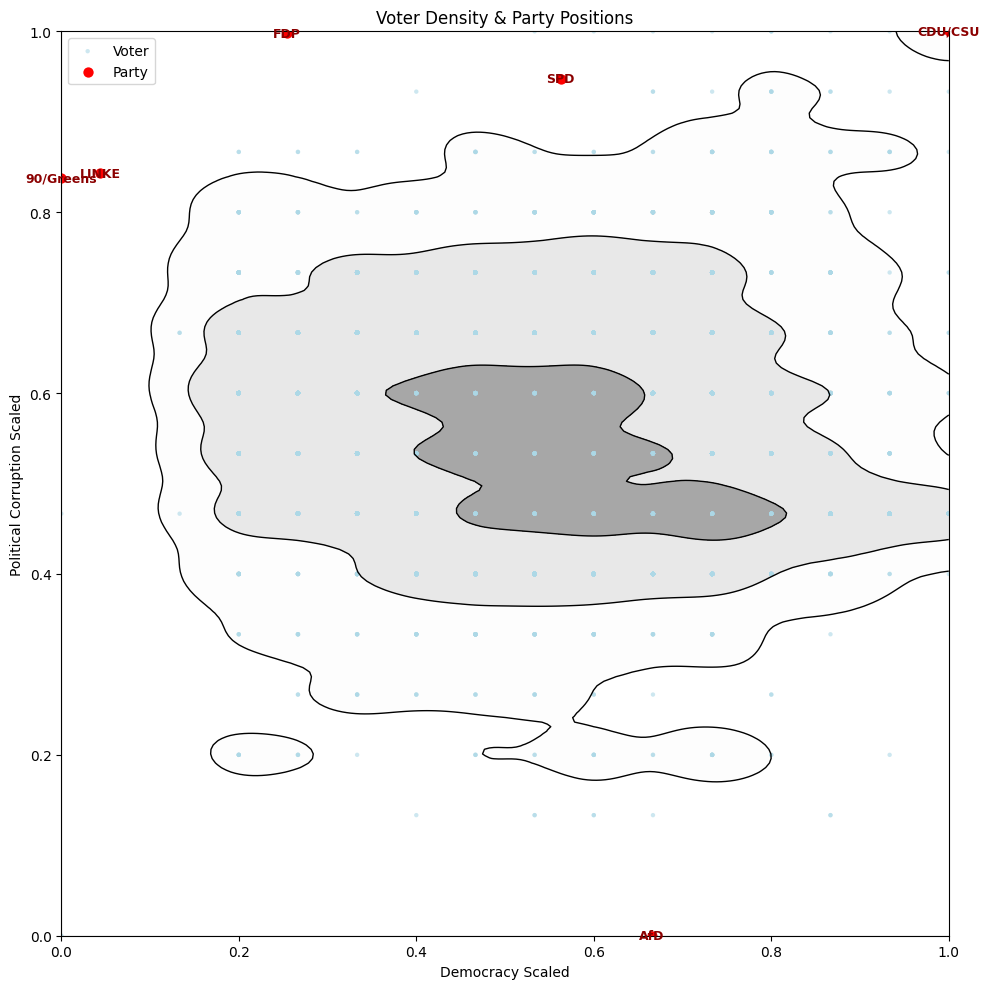

In [12]:
x_v = voter_scaled["Democracy Scaled"].values
y_v = voter_scaled["Political Corruption Scaled"].values

# Stack the data into a 2×N array and hand it to SciPy’s gaussian_kde
xy = np.vstack([x_v, y_v])
# In two-dimensional KDE, the data points are smoothed in both dimensions, resulting in a surface that represents the joint probability density of the two variables
kde = gaussian_kde(xy, bw_method='scott')

# You build a 200×200 grid over the observed data‐range, evaluate the estimation at each grid point, and reshape back into a 2-D array zi
nbins = 200
xi = np.linspace(x_v.min(), x_v.max(), nbins)
yi = np.linspace(y_v.min(), y_v.max(), nbins)
xi, yi = np.meshgrid(xi, yi)
zi = kde(np.vstack([xi.ravel(), yi.ravel()])).reshape(xi.shape)

# surface can be visualized using contour plots, where each contour line represents a region of constant density
levels = np.percentile(zi, [50, 75, 95])

plt.figure(figsize=(10, 10))
# filled contours
plt.contourf(xi, yi, zi,
             levels=[levels[0], levels[1], levels[2], zi.max()],
             cmap="Greys",    # or any sequential colormap
             alpha=0.5)
# outline the contour levels
plt.contour(xi, yi, zi, levels=levels, colors="k", linewidths=1)

# overlay the voter points 
plt.scatter(x_v, y_v, s=10, c="lightblue", edgecolor="none", alpha=0.6, label="Voter")

# overlay the party means
px = party_scaled_df["Democracy Scaled"].values
py = party_scaled_df["Political Corruption Scaled"].values
labels = party_scaled_df["Party_Name"].values

plt.scatter(px, py, s=80, c="red", edgecolor="white", linewidth=1.5, label="Party")
for name, x, y in zip(labels, px, py):
    plt.text(x, y, name, fontsize=9, fontweight="bold",
             ha="center", va="center", color="darkred")

plt.axhline(0, color="grey", lw=0.8)
plt.axvline(0, color="grey", lw=0.8)
plt.xlabel("Democracy Scaled")
plt.ylabel("Political Corruption Scaled")
plt.title("Voter Density & Party Positions")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()